# <CENTER> ЧАСТЬ 2
# <CENTER> Разведывательный Анализ данных

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go 

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import shapiro
from sklearn import cluster, metrics
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [433]:
df = pd.read_csv('data/total/df_total_2.csv',  index_col='Регион')
df.head()

,index,Child_mortality_rural,Child_mortality_urban,Disabled_18_30,Disabled_31_60,Disabled_61_,Disabled_total,Morbidity_onko,Morbidity_psiho,Morbidity_total,...,GRP,Reg_prod_manufactor,Reg_prod_mining,Reg_prod_total,Retail,Alco,Drug,Newborn,Сrimes_drug,Сrimes_total
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,0,39.59,63.64,52985.91,444265.82,934390.86,1464366.05,2589.46,1566.49,41564.62,...,296532.88,5.212134e+08,1.152325e+08,1.115343e+09,114915.23,91.07,6.49,14792.82,3587.91,9673.41
Брянская область,1,42.09,70.18,48351.36,384930.09,733906.64,1199911.55,2595.53,1564.57,43703.95,...,159780.83,1.624191e+08,2.869199e+05,3.097550e+08,109399.95,145.76,12.36,12476.00,3816.09,10100.14
Владимирская область,2,27.95,84.77,48950.32,386048.59,780816.45,1248538.82,2588.23,1613.43,50096.00,...,188789.51,3.448643e+08,3.491436e+06,6.444769e+08,87961.45,117.60,10.19,13653.14,3938.05,10536.09
Воронежская область,3,44.27,114.95,57292.09,478965.55,928332.91,1497314.00,2617.92,1705.19,29806.02,...,211082.92,3.488616e+08,5.937693e+06,7.443726e+08,123738.77,122.90,15.02,19701.54,4231.77,11535.32
Ивановская область,4,15.36,66.41,45812.27,350638.14,693232.23,1122406.09,2593.44,1708.60,48225.12,...,131491.97,1.141104e+08,8.266384e+05,2.403929e+08,88192.55,136.98,10.30,10781.22,3615.36,9632.55


- `Child_mortality_rural`- число умерших на первом году жизни детей за год, в сельской местности.     
- `Child_mortality_urban`- число умерших на первом году жизни детей за год, в городской местности.
- `Disabled_18_30`- число людей с инвалидностью в возрасте от 18 до 30 лет.
- `Disabled_31_60`- число людей с инвалидностью в возрасте от 31 до 60 лет.
- `Disabled_61_`- число людей с инвалидностью в возрасте от 61 года и старше.
- `Disabled_total`- общее число людей с инвалидностью.
- `Morbidity_onko`- общее количество злокачественных образований на 100 тыс. человек населения.
- `Morbidity_psiho`- общее количество психических расстройств и расстройств поведения на 100 тыс. человек населения.
- `Morbidity_total`- общее количество всех заболеваний на 100 тыс. человек населения.
- `Poverty_percent`- процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума).
- `Welfare`- расходы на социальную политику от общих расходов бюджета региона, % в год.
- `Cash_income`- среднедушевые и реальные денежные доходы населения, номинальная и реальная начисленная зарплата.
- `Socdem_deti`- распределение малоимущего населения по социально-демографической группе "Дети".
- `Socdem_pens`- распределение малоимущего населения по социально-демографической группе "Пенсионеры".
- `Socdem_trud`- распределение малоимущего населения по социально-демографической группе "Трудящиеся".
- `Housing_live`- размер жилой площади в расчете на члена домохозяйства.
- `Population`- Численность населения.
- `GRP`- валовойрегиональныйпродукт на душу населения, в рублях.
- `Reg_prod_manufactor`- объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами, в сфере Обрабатывающих производств (в тысячах рублей).
- `Reg_prod_mining`- объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами, в Добыче полезных ископаемых (в тысячах рублей).
- `Reg_prod_total`- объём отгруженных товаров собственного производства или работ/услуг, выполненных собственными силами, по всем видам производства (в тысячах рублей).
- `Retail`- оборот розничной торговли на душу населения, в рублях.
- `Alco`- сведения о заболеваемости алкоголизмом, на 100 тыс. населения.
- `Drug`- сведения о заболеваемости наркоманией, на 100 тыс. населения.
- `Newborn`-ежегодно рождённые без учёта мертворождённых.
- `Сrimes_drug`- сведения о преступлениях, совершённых под действиями алкогольного, наркотического и токсического опьянений.
- `Сrimes_total`- сведения обо всех преступлениях.


In [434]:
#Удалим лишний столбец:
df = df.drop(columns=['index'])

In [435]:
#Посмотрим на распределение и пропуски.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Белгородская область to Чеченская Республика
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Child_mortality_rural  85 non-null     float64
 1   Child_mortality_urban  85 non-null     float64
 2   Disabled_18_30         85 non-null     float64
 3   Disabled_31_60         85 non-null     float64
 4   Disabled_61_           85 non-null     float64
 5   Disabled_total         85 non-null     float64
 6   Morbidity_onko         85 non-null     float64
 7   Morbidity_psiho        85 non-null     float64
 8   Morbidity_total        85 non-null     float64
 9   Poverty_percent        85 non-null     float64
 10  Welfare                85 non-null     float64
 11  Cash_income            85 non-null     float64
 12  Socdem_deti            85 non-null     float64
 13  Socdem_pens            85 non-null     float64
 14  Socdem_trud            85 no

In [436]:
df['Cash_income'].describe()

count       85.000000
mean     30100.803294
std      12765.987518
min      16064.170000
25%      23330.500000
50%      26623.330000
75%      30692.500000
max      78070.500000
Name: Cash_income, dtype: float64

До 2021 года «черта бедности» (жизнь на сумму ниже прожиточного минимума) в России определялась стоимостью минимальной продуктовой корзины. В том же году правительство «отвязало» уровень бедности от цен на базовые продукты: с 2021 года прожиточный минимум рассчитывается как 44.2 % от медианного дохода граждан РФ за прошлый год.

Создадим дополнительный признак: `Living_wage` - прожиточный минимум:

In [437]:
df['Living_wage']=df['Cash_income']*0.442

In [438]:
df.describe()

,Child_mortality_rural,Child_mortality_urban,Disabled_18_30,Disabled_31_60,Disabled_61_,Disabled_total,Morbidity_onko,Morbidity_psiho,Morbidity_total,Poverty_percent,...,Reg_prod_manufactor,Reg_prod_mining,Reg_prod_total,Retail,Alco,Drug,Newborn,Сrimes_drug,Сrimes_total,Living_wage
count,85.000000,85.000000,85.000000,85.000000,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,85.000000,...,8.500000e+01,8.500000e+01,8.500000e+01,85.000000,85.000000,85.000000,85.0000,85.000000,85.000000,85.000000
mean,52.514588,108.530235,54428.165765,407966.533765,7.731147e+05,1.268233e+06,2585.711294,1964.303059,42817.559765,19.364471,...,3.956013e+08,1.393326e+08,9.964343e+08,105878.620471,119.627176,12.699176,17741.8500,4085.433647,11141.614706,13304.555056
std,50.421687,109.816649,16756.163707,113815.948129,2.722000e+05,3.852520e+05,8.506658,784.942186,11126.608165,5.842304,...,6.362701e+08,3.676144e+08,1.503109e+09,32075.093766,37.927105,4.830132,14295.6424,884.186335,2715.607265,5642.566483
min,0.950000,3.140000,38663.730000,290518.180000,5.519048e+05,9.139174e+05,2564.550000,1446.220000,10939.610000,7.400000,...,5.836593e+05,1.300467e+05,6.804462e+06,27395.950000,58.010000,5.580000,3772.1400,2982.640000,7736.090000,7100.363140
25%,27.770000,47.730000,45812.270000,345961.450000,6.309235e+05,1.068419e+06,2580.730000,1561.580000,38427.820000,15.800000,...,7.230351e+07,1.446106e+06,2.132065e+08,88219.140000,101.330000,8.940000,9352.2300,3482.410000,9239.000000,10312.081000
50%,36.090000,72.410000,48692.000000,369554.450000,7.085358e+05,1.170637e+06,2585.930000,1632.480000,43703.950000,18.450000,...,1.841608e+08,1.332490e+07,5.031198e+08,103980.360000,115.750000,11.500000,12758.6400,3806.730000,10118.000000,11767.511860
75%,59.730000,128.320000,57241.320000,444265.820000,8.263591e+05,1.381196e+06,2590.240000,1789.080000,48317.080000,21.500000,...,5.146587e+08,7.978268e+07,1.155692e+09,120019.550000,130.180000,15.020000,21761.8100,4555.860000,12485.730000,13566.085000
max,351.950000,783.360000,137880.050000,975683.590000,2.542836e+06,3.670566e+06,2617.920000,4295.280000,89233.690000,40.970000,...,4.753555e+09,2.690549e+09,1.107385e+10,259127.770000,331.560000,25.810000,95206.7000,6868.180000,18800.050000,34507.161000


In [439]:
#Посмотрим сколько регионов имеют прожиточный минимум ниже среднего:
mean_Living_wage = df['Living_wage'].mean()
len(df[df['Living_wage'] < mean_Living_wage])

62

**Выводы:** 
по нашей таблице видно:
- Процент бедности в среднем 19%;
- Заболевание алгоголизмом составляет 119 на 100тыс населения, т.е. 1,19млн;
- Средний прожиточный минимум составляет 13304руб. Ниже этого уровня находятся 62 региона!
- Почти треть всех преступлений совершается в состоянии какого-либа опьянения.


In [440]:
#Т.к. мы хорошо обрабатывали данные, пропусков у нас нет:
df.isnull().sum().sum()

0

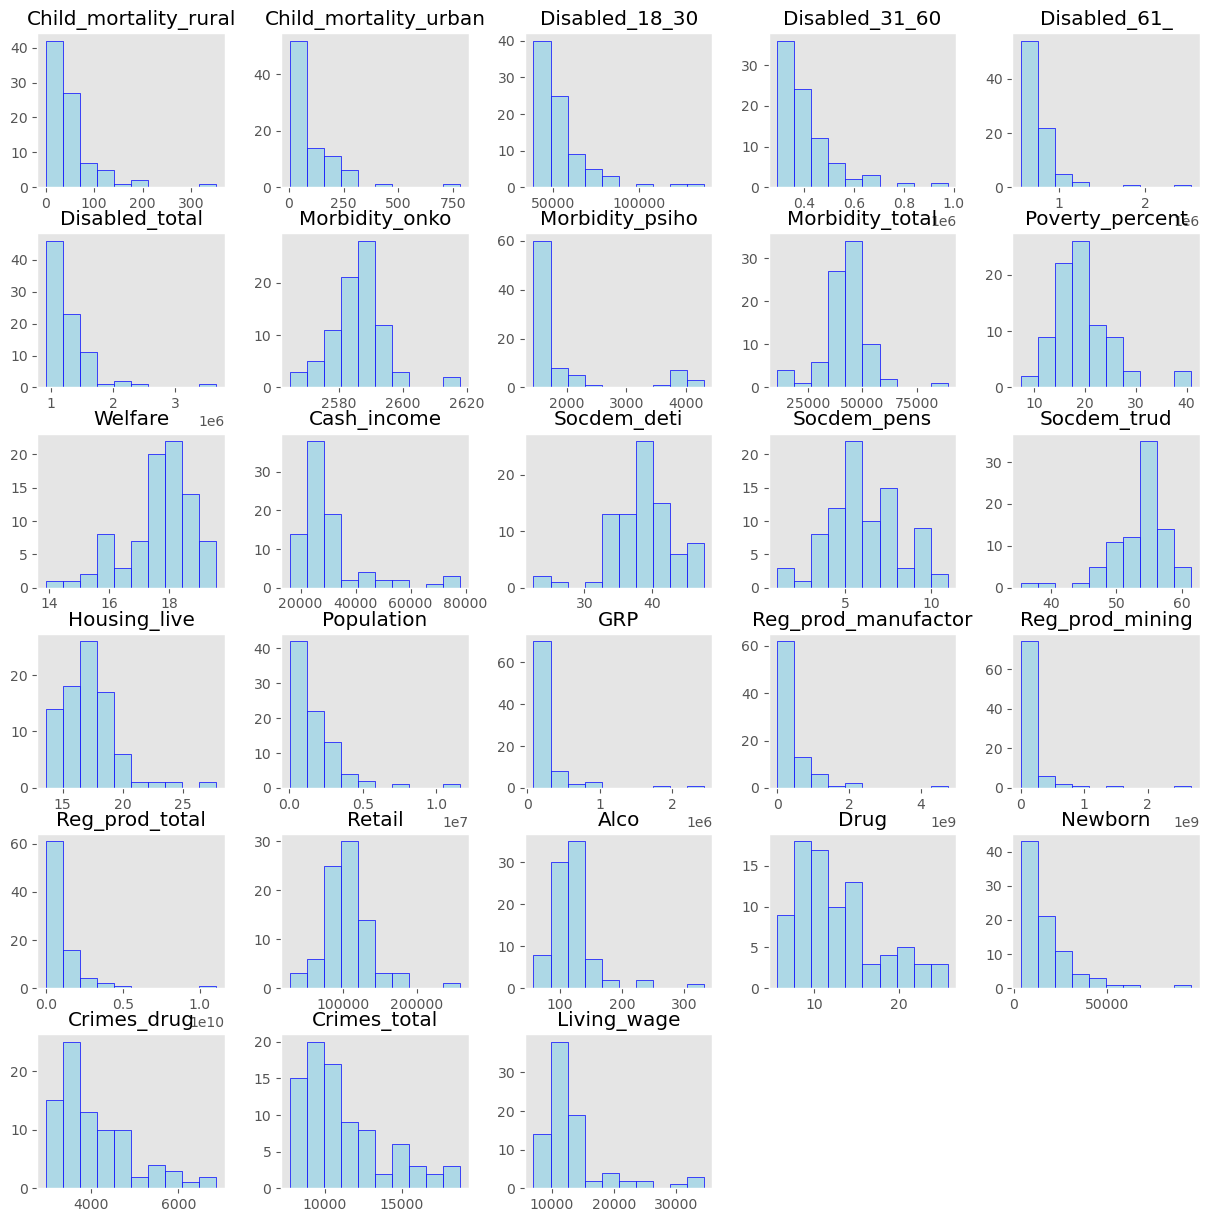

In [441]:
# Визуализируем распределение признаков
df.hist(figsize = (15,15), grid = False, color="lightblue" , ec="blue");
plt.show()

Некоторые данные распределены нормально, а вот некоторые имеют логарифмическое преобразование и их нужно преобразовать:

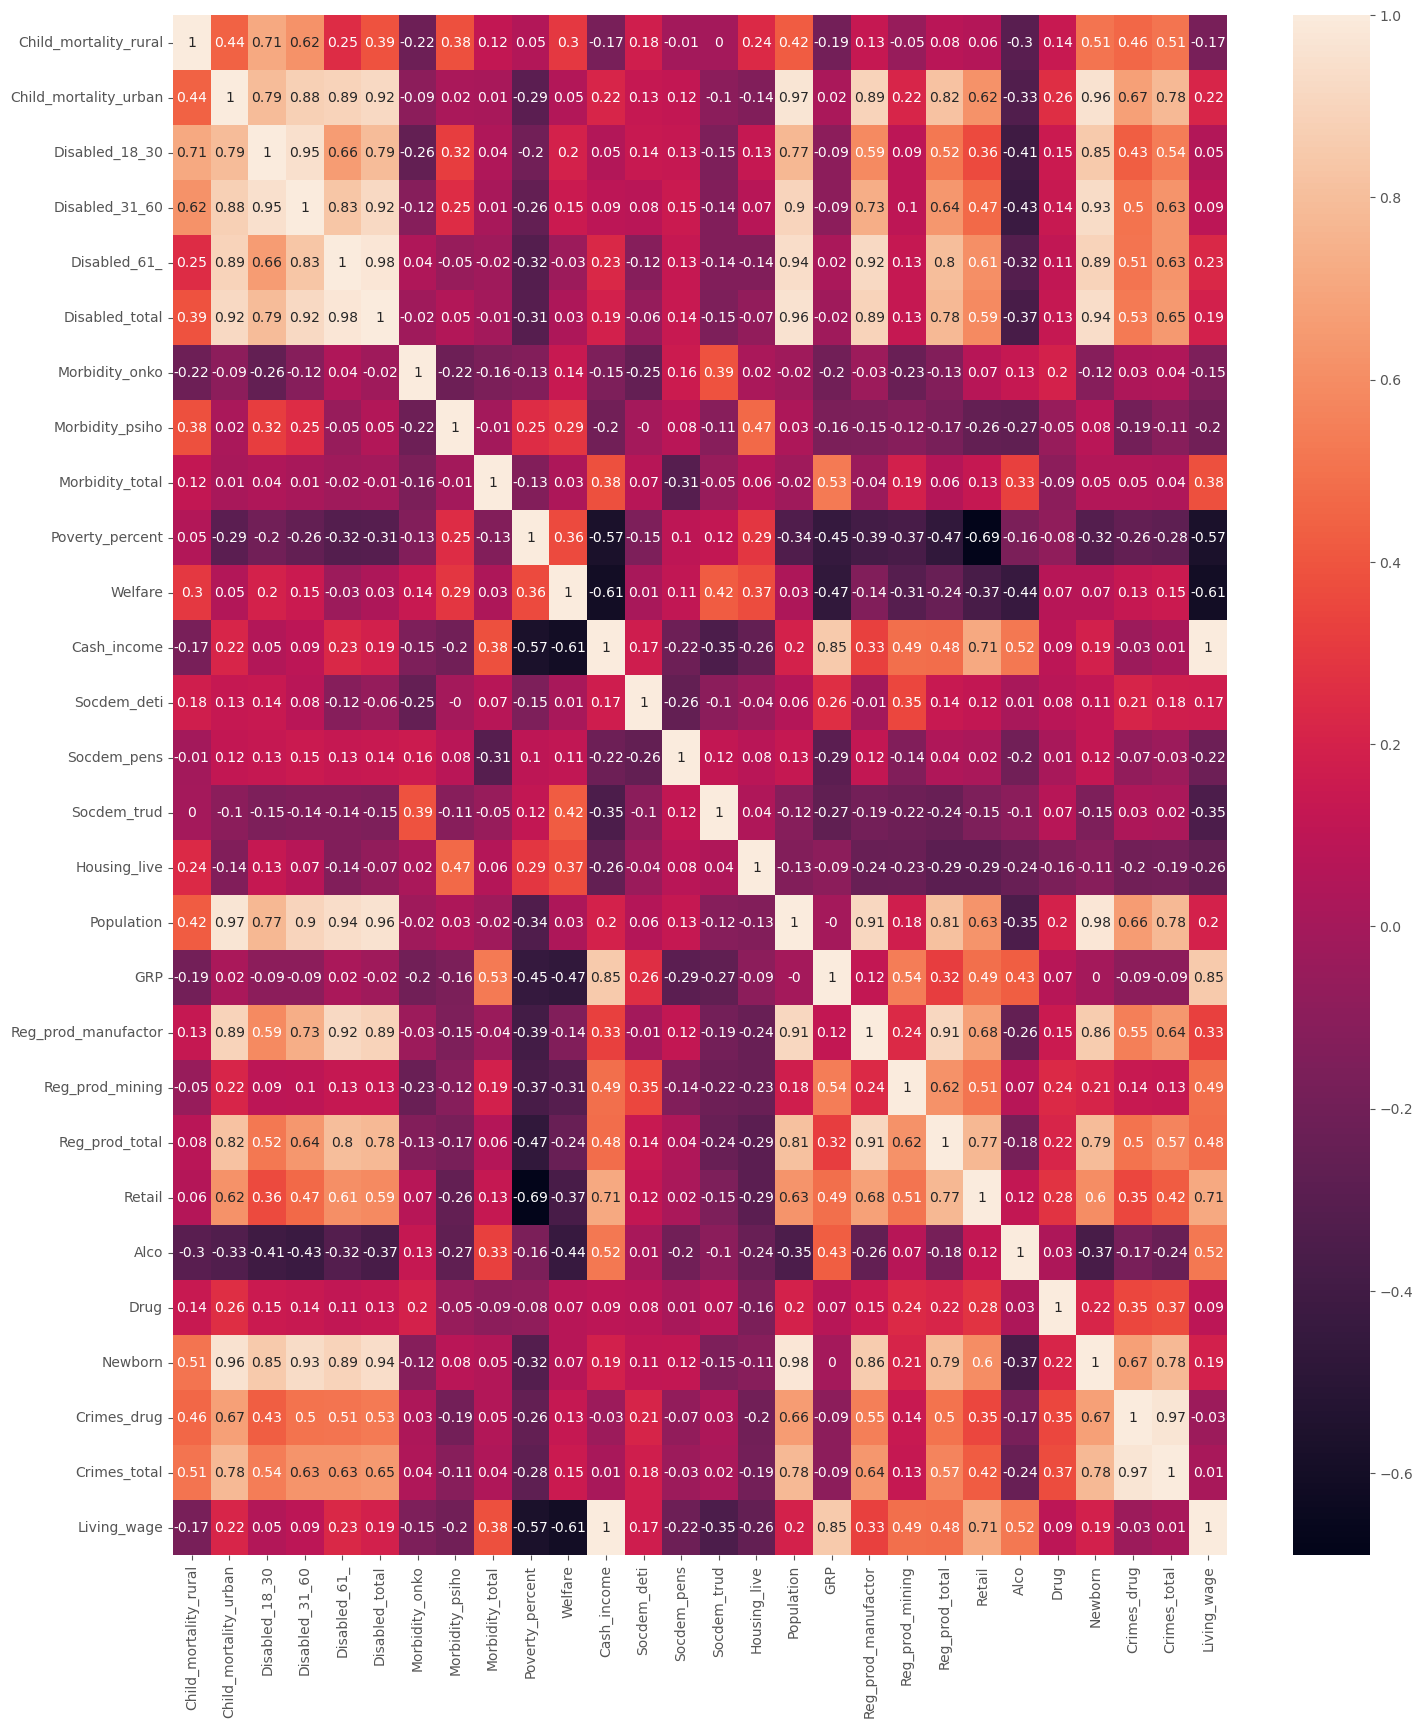

In [442]:
# Построим тепловую карту и посмотрим на корреляции пар всех наших признаков:
plt.figure(figsize=(17, 20))
sns.heatmap(df.corr().round(decimals=2), annot=True)
plt.show()

Выделим Сильноскорелированные признаки со значением больше 0.9:
- `Child_mortality_urban` и `Disabled_total` 0.92
- `Child_mortality_urban` и `Population` 0.97
- `Child_mortality_urban` и `Newborn`0.96
- `Disabled_18_30` и `Disabled_31_60` 0.95
- `Disabled_31_60` и `Disabled_total` 0.92
- `Disabled_31_60` и `Newborn` 0.93
- `Disabled_61_` и `Disabled_total` 0.98
- `Disabled_61_` и `Population` 0.94
- `Disabled_61_` и `Reg_prod_manufactor` 0.92
- `Disabled_total` и `Population` 0.96
- `Disabled_total` и `Newborn` 0.94
- `Population` и `Reg_prod_manufactor` 0.91
- `Population` и ``Newborn` 0.98
- `Reg_prod_manufactor` и `Reg_prod_total` 0.91
- `Crimes_drug`и`Crimes_total` 0.97
- `Living_wage` и `Cash_income` 1



А самая большая обратная корреляция 0.69 у `Poverty_percent` и `Retail`

In [443]:
#Удалим из набора эти признаки:
df= df.drop(['Living_wage', 'Disabled_total', 'Population', 'Newborn', 'Reg_prod_manufactor', 'Сrimes_drug' , 'Disabled_18_30', 'Child_mortality_urban'], axis=1)

**Воспользуемся методом рекрсивного исключения признаков:**

In [445]:
y = df['Poverty_percent']
X = df.drop(columns='Poverty_percent')

In [446]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['Welfare', 'Socdem_deti', 'Housing_live'], dtype=object)

In [447]:
X_train.columns

Index(['Child_mortality_rural', 'Disabled_31_60', 'Disabled_61_',
       'Morbidity_onko', 'Morbidity_psiho', 'Morbidity_total', 'Welfare',
       'Cash_income', 'Socdem_deti', 'Socdem_pens', 'Socdem_trud',
       'Housing_live', 'GRP', 'Reg_prod_mining', 'Reg_prod_total', 'Retail',
       'Alco', 'Drug', 'Сrimes_total'],
      dtype='object')

In [448]:
#Удалим из набора и эти признаки:
df = df.drop(['Welfare', 'Socdem_deti', 'Housing_live'], axis=1)

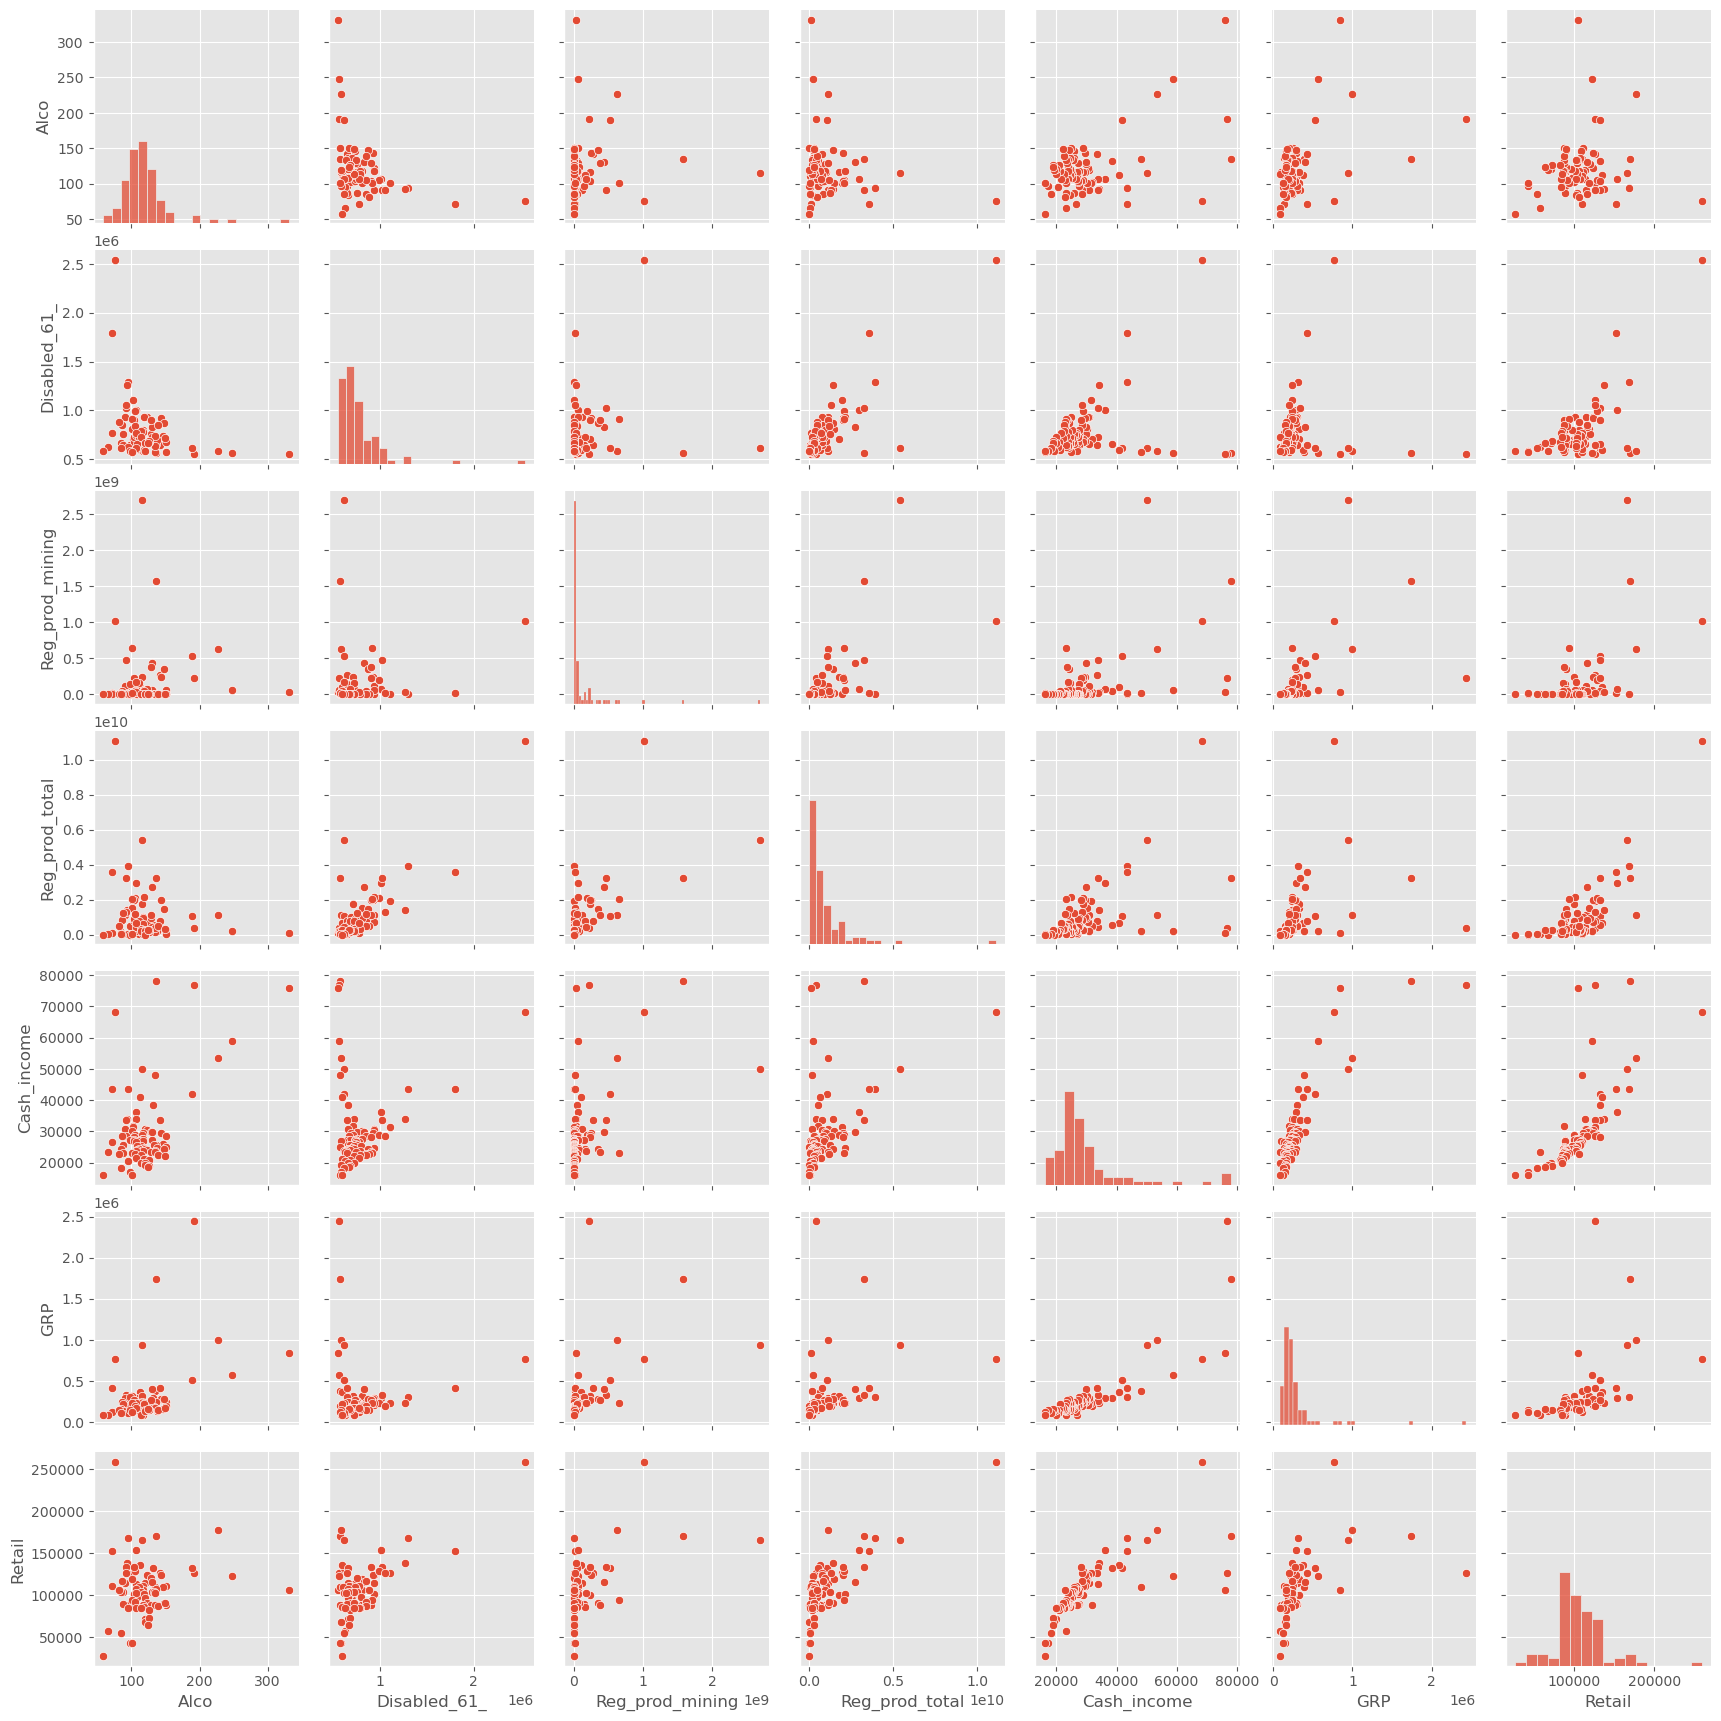

In [451]:
# Посмотрим на разброс пар признаков с наибольшей коллинеарностью:
sns.pairplot(df, vars=['Alco', 'Disabled_61_', 'Reg_prod_mining', 'Reg_prod_total', 'Cash_income', 'GRP', 'Retail'])

Выводы:
Чем выше доходы, тем больше розничная торговля, региональный продукт, производство, заболевание алкоголизмом;


Перед кластеризацией выполним стандартизацию признаков. Так как признаки датасета имеют большие различия между своими диапазонами, и для моделей машинного обучения, основанных на вычислении дистанции между точками на графике, это спровоцирует искаженное восприятие данных. Но для начала поработаем с выбросами.

**Работа с выбросами:**

In [634]:
df2=df.copy()

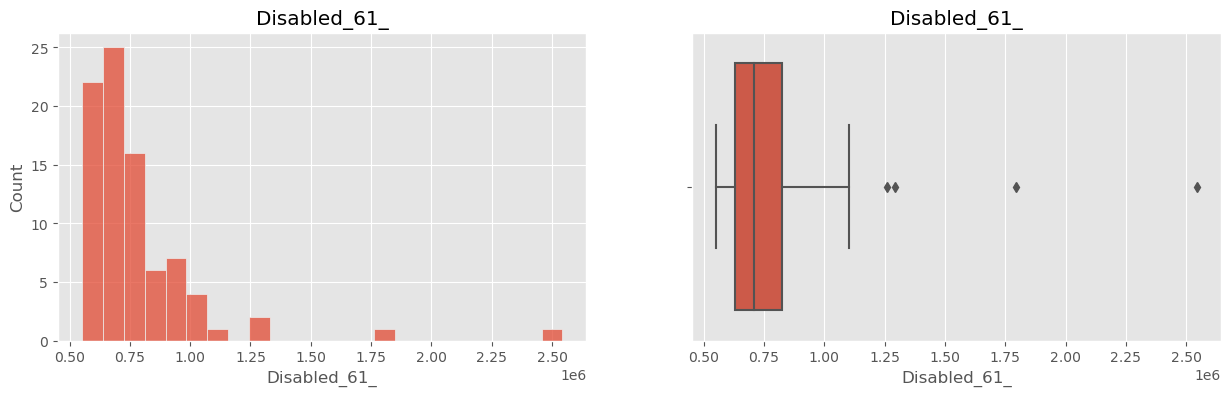

In [635]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Disabled_61_', ax=axes[0]);
histplot.set_title('Disabled_61_');
boxplot = sns.boxplot(data=df2, x='Disabled_61_', ax=axes[1]);
boxplot.set_title('Disabled_61_');

In [636]:
max = df2.loc[df2['Disabled_61_']<1050000, 'Disabled_61_'].max()
df2["Disabled_61_"] = df2["Disabled_61_"].mask(df2["Disabled_61_"] >1050000, max)

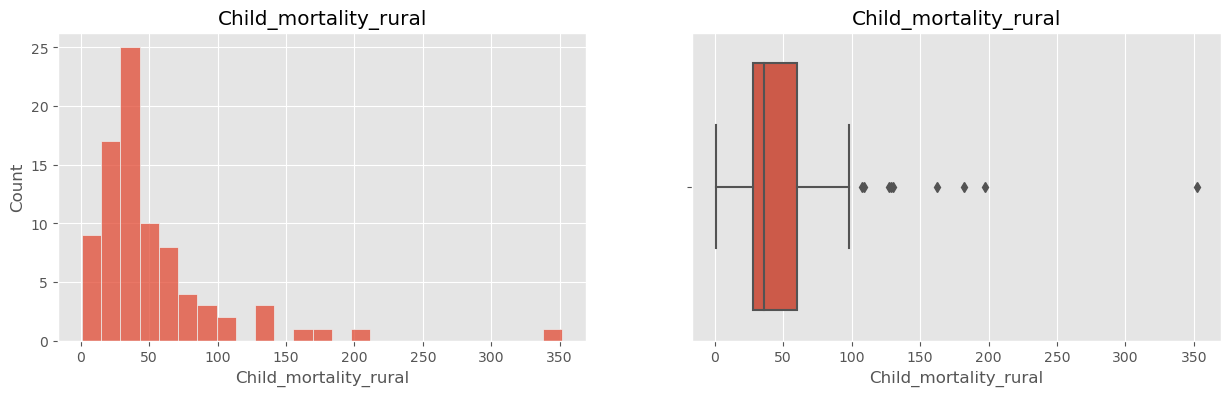

In [638]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Child_mortality_rural', ax=axes[0]);
histplot.set_title('Child_mortality_rural');
boxplot = sns.boxplot(data=df2, x='Child_mortality_rural', ax=axes[1]);
boxplot.set_title('Child_mortality_rural');

In [639]:
max = df2.loc[df2['Child_mortality_rural']<100, 'Child_mortality_rural'].max()
df2["Child_mortality_rural"] = df2["Child_mortality_rural"].mask(df2["Child_mortality_rural"] >100, max)

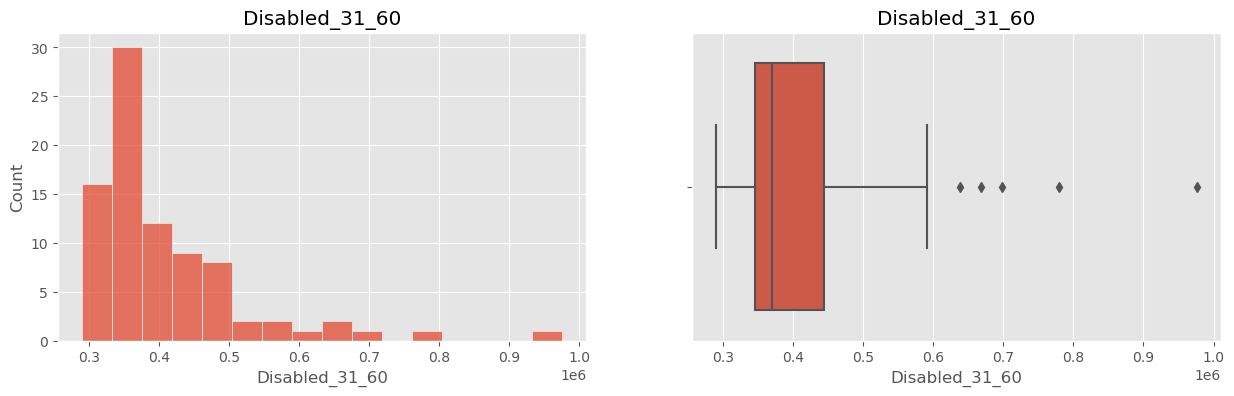

In [641]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Disabled_31_60', ax=axes[0]);
histplot.set_title('Disabled_31_60');
boxplot = sns.boxplot(data=df2, x='Disabled_31_60', ax=axes[1]);
boxplot.set_title('Disabled_31_60');

In [642]:
max = df2.loc[df2['Disabled_31_60']< 600000, 'Disabled_31_60'].max()
df2["Disabled_31_60"] = df2["Disabled_31_60"].mask(df2["Disabled_31_60"] >600000, max)

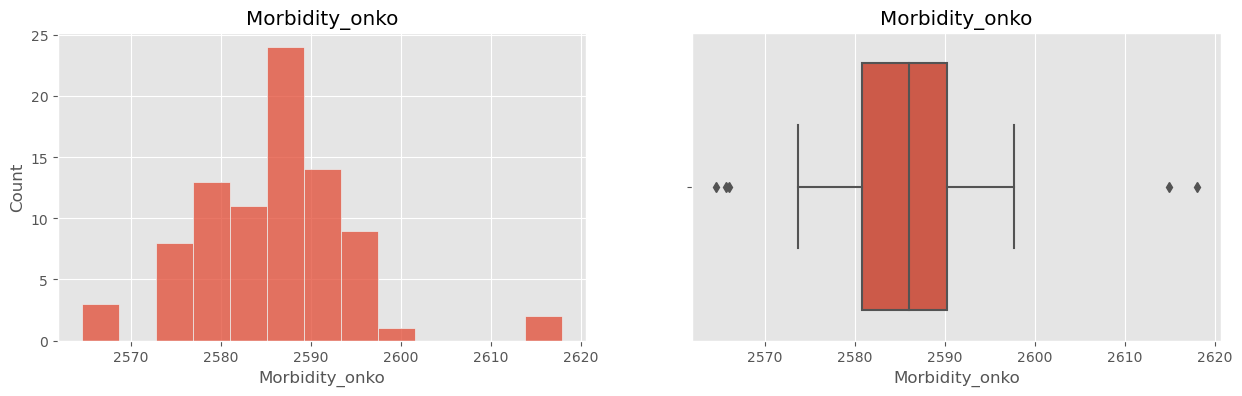

In [644]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Morbidity_onko', ax=axes[0]);
histplot.set_title('Morbidity_onko');
boxplot = sns.boxplot(data=df2, x='Morbidity_onko', ax=axes[1]);
boxplot.set_title('Morbidity_onko');

In [645]:
max = df2.loc[df2['Morbidity_onko']<2600, 'Morbidity_onko'].max()
df2["Morbidity_onko"] = df2["Morbidity_onko"].mask(df2["Morbidity_onko"] >2600, max)

min = df2.loc[df2['Morbidity_onko']>2570, 'Morbidity_onko'].min()
df2["Morbidity_onko"] = df2["Morbidity_onko"].mask(df2["Morbidity_onko"] <2570, min)

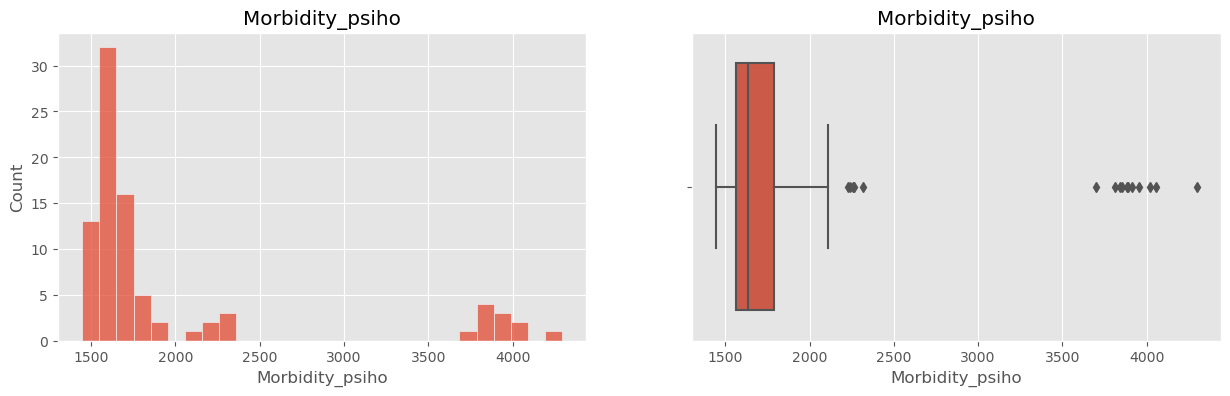

In [647]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Morbidity_psiho', ax=axes[0]);
histplot.set_title('Morbidity_psiho');
boxplot = sns.boxplot(data=df2, x='Morbidity_psiho', ax=axes[1]);
boxplot.set_title('Morbidity_psiho');

In [648]:
max = df2.loc[df2['Morbidity_psiho']<2000, 'Morbidity_psiho'].max()
df2["Morbidity_psiho"] = df2["Morbidity_psiho"].mask(df2["Morbidity_psiho"] >2000, max)

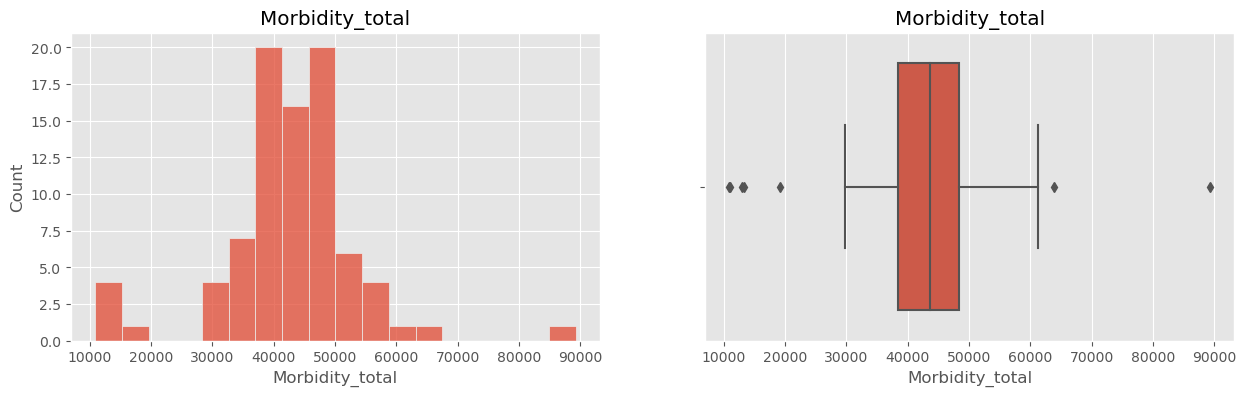

In [650]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Morbidity_total', ax=axes[0]);
histplot.set_title('Morbidity_total');
boxplot = sns.boxplot(data=df2, x='Morbidity_total', ax=axes[1]);
boxplot.set_title('Morbidity_total');

In [653]:
max = df2.loc[df2['Morbidity_total']<63000, 'Morbidity_total'].max()
df2["Morbidity_total"] = df2["Morbidity_total"].mask(df2["Morbidity_total"] >63000, max)

min = df2.loc[df2['Morbidity_total']>20000, 'Morbidity_total'].min()
df2["Morbidity_total"] = df2["Morbidity_total"].mask(df2["Morbidity_total"] <20000, min)

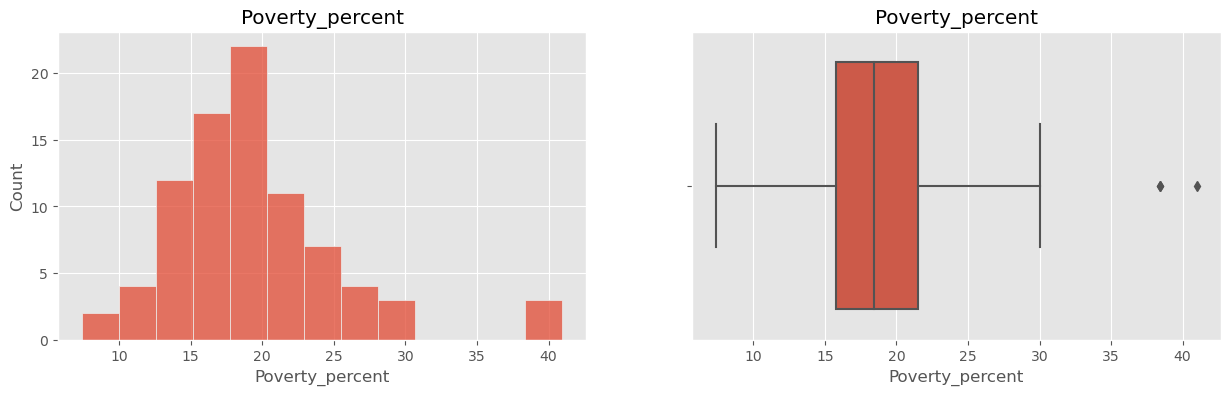

In [655]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Poverty_percent', ax=axes[0]);
histplot.set_title('Poverty_percent');
boxplot = sns.boxplot(data=df2, x='Poverty_percent', ax=axes[1]);
boxplot.set_title('Poverty_percent');

In [656]:
max = df2.loc[df2['Poverty_percent']<35, 'Poverty_percent'].max()
df2["Poverty_percent"] = df2["Poverty_percent"].mask(df2["Poverty_percent"] >35, max)

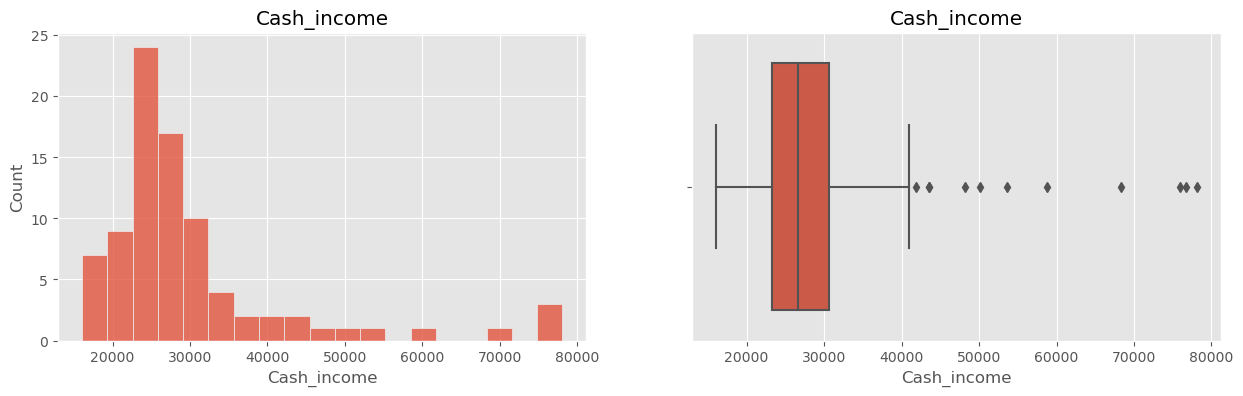

In [658]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Cash_income', ax=axes[0]);
histplot.set_title('Cash_income');
boxplot = sns.boxplot(data=df2, x='Cash_income', ax=axes[1]);
boxplot.set_title('Cash_income');

In [659]:
max = df2.loc[df2['Cash_income']<55000, 'Cash_income'].max()
df2["Cash_income"] = df2["Cash_income"].mask(df2["Cash_income"] >55000, max)

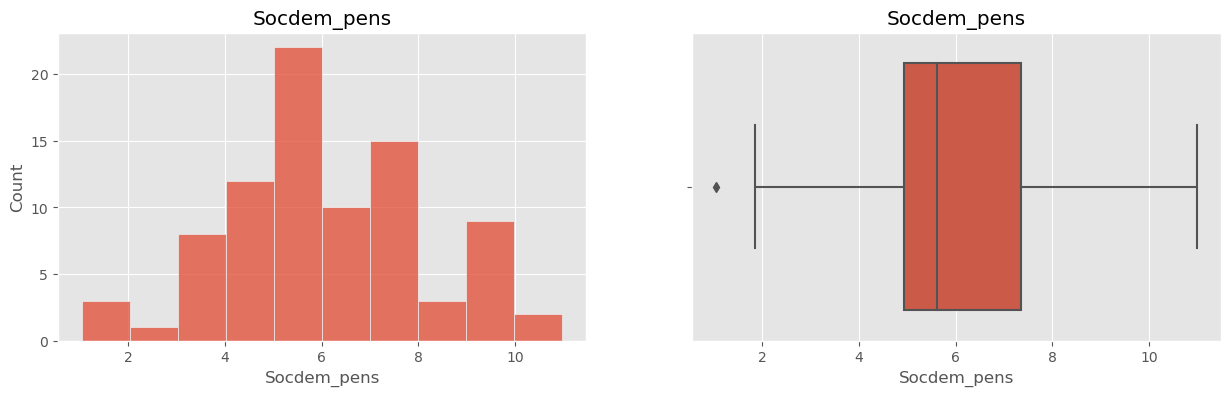

In [661]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Socdem_pens', ax=axes[0]);
histplot.set_title('Socdem_pens');
boxplot = sns.boxplot(data=df2, x='Socdem_pens', ax=axes[1]);
boxplot.set_title('Socdem_pens');

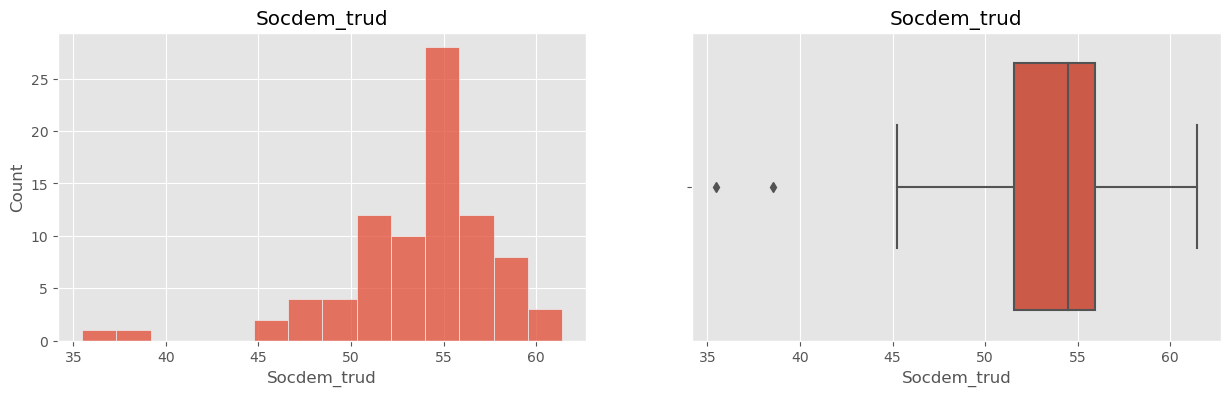

In [662]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Socdem_trud', ax=axes[0]);
histplot.set_title('Socdem_trud');
boxplot = sns.boxplot(data=df2, x='Socdem_trud', ax=axes[1]);
boxplot.set_title('Socdem_trud');

In [663]:
min = df2.loc[df2['Socdem_trud']>40, 'Socdem_trud'].min()
df2["Socdem_trud"] = df2["Socdem_trud"].mask(df2["Socdem_trud"] <40, min)

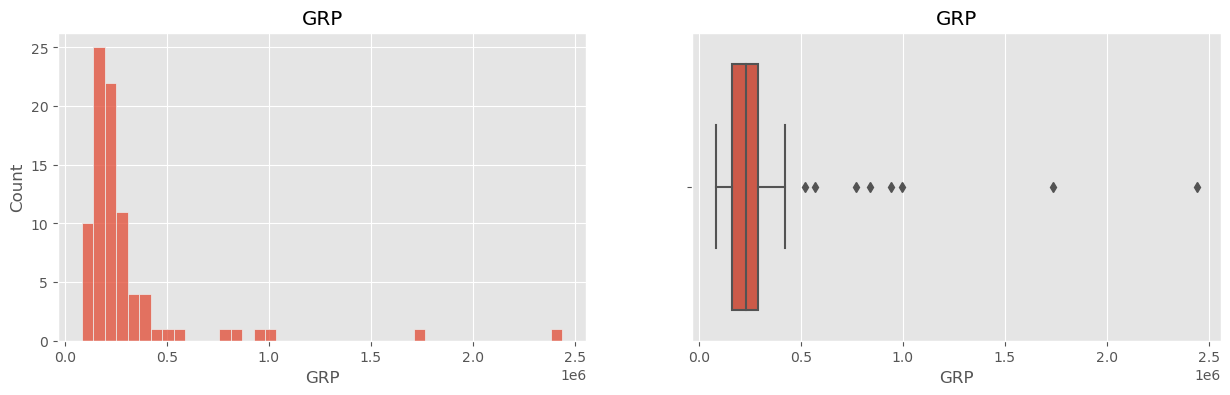

In [665]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='GRP', ax=axes[0]);
histplot.set_title('GRP');
boxplot = sns.boxplot(data=df2, x='GRP', ax=axes[1]);
boxplot.set_title('GRP');

In [666]:
max = df2.loc[df2['GRP']<500000, 'GRP'].max()
df2["GRP"] = df2["GRP"].mask(df2["GRP"] >500000, max)

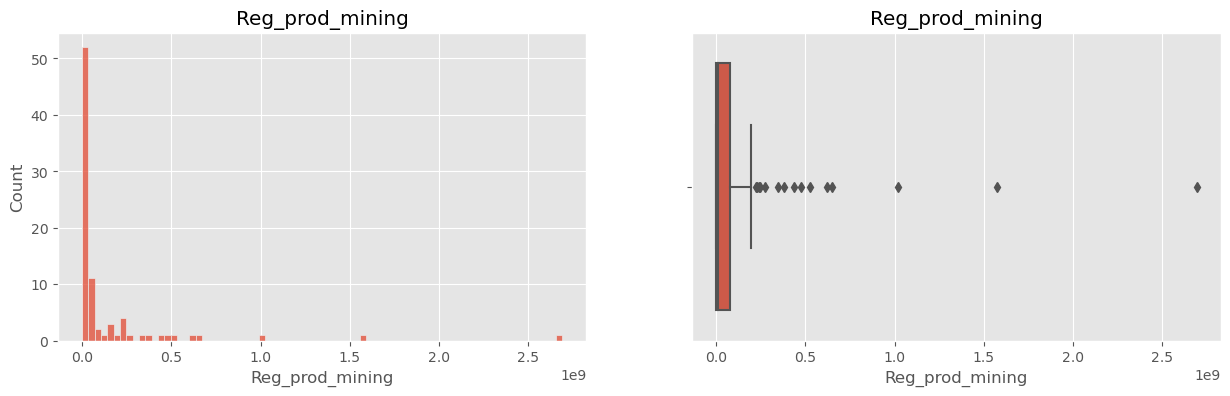

In [668]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Reg_prod_mining', ax=axes[0]);
histplot.set_title('Reg_prod_mining');
boxplot = sns.boxplot(data=df2, x='Reg_prod_mining', ax=axes[1]);
boxplot.set_title('Reg_prod_mining');

In [669]:
max = df2.loc[df2['Reg_prod_mining']<100000000, 'Reg_prod_mining'].max()
df2["Reg_prod_mining"] = df2["Reg_prod_mining"].mask(df2["Reg_prod_mining"] >100000000, max)

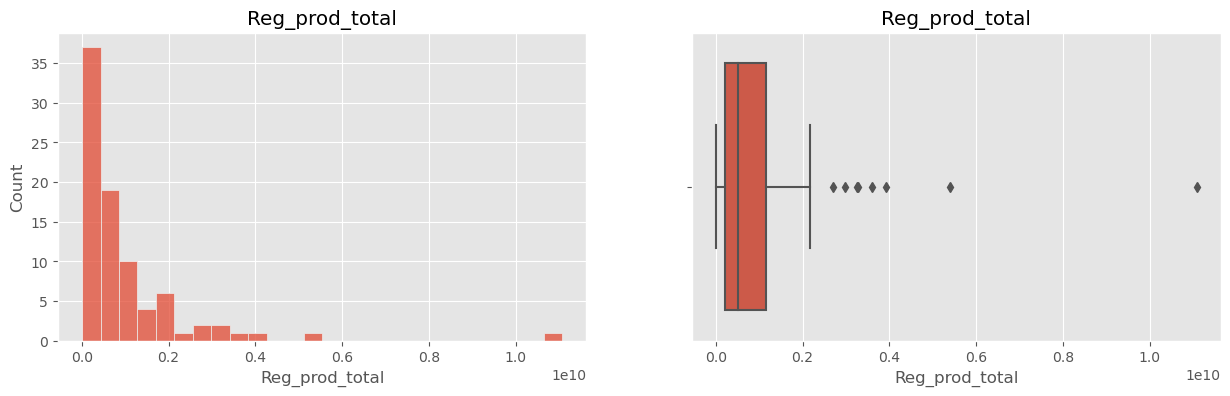

In [671]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Reg_prod_total', ax=axes[0]);
histplot.set_title('Reg_prod_total');
boxplot = sns.boxplot(data=df2, x='Reg_prod_total', ax=axes[1]);
boxplot.set_title('Reg_prod_total');

In [672]:
max = df2.loc[df2['Reg_prod_total']<2500000000, 'Reg_prod_total'].max()
df2["Reg_prod_total"] = df2["Reg_prod_total"].mask(df2["Reg_prod_total"] >2500000000, max)

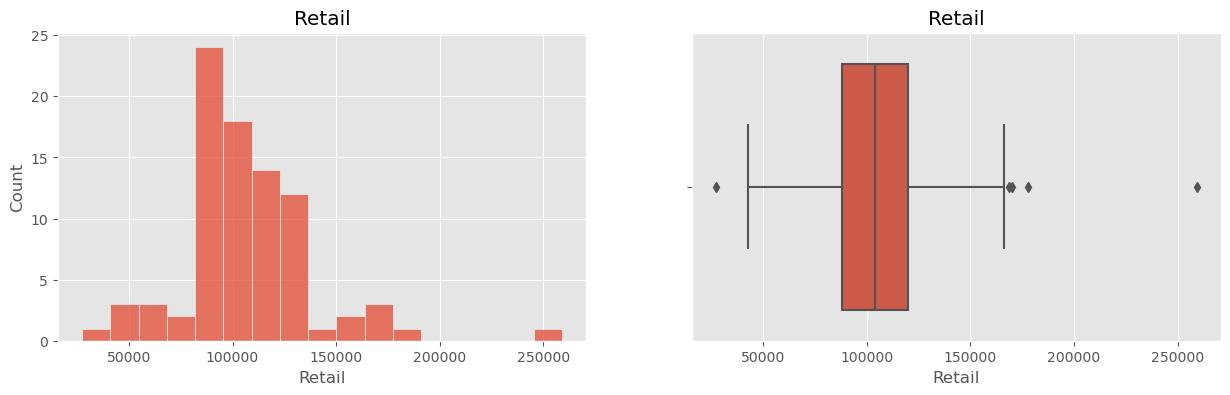

In [674]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Retail', ax=axes[0]);
histplot.set_title('Retail');
boxplot = sns.boxplot(data=df2, x='Retail', ax=axes[1]);
boxplot.set_title('Retail');

In [675]:
max = df2.loc[df2['Retail']<165000, 'Retail'].max()
df2["Retail"] = df2["Retail"].mask(df2["Retail"] >165000, max)

min = df2.loc[df2['Retail']>40000, 'Retail'].min()
df2["Retail"] = df2["Retail"].mask(df2["Retail"] <40000, min)

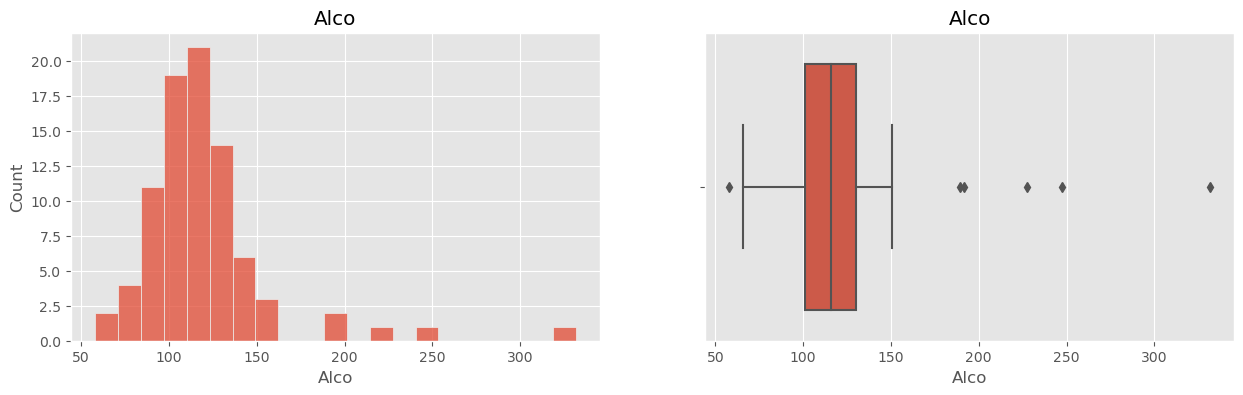

In [677]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Alco', ax=axes[0]);
histplot.set_title('Alco');
boxplot = sns.boxplot(data=df2, x='Alco', ax=axes[1]);
boxplot.set_title('Alco');

In [678]:
max = df2.loc[df2['Alco']<175, 'Alco'].max()
df2["Alco"] = df2["Alco"].mask(df2["Alco"] >175, max)

min = df2.loc[df2['Alco']>60, 'Alco'].min()
df2["Alco"] = df2["Alco"].mask(df2["Alco"] <60, min)

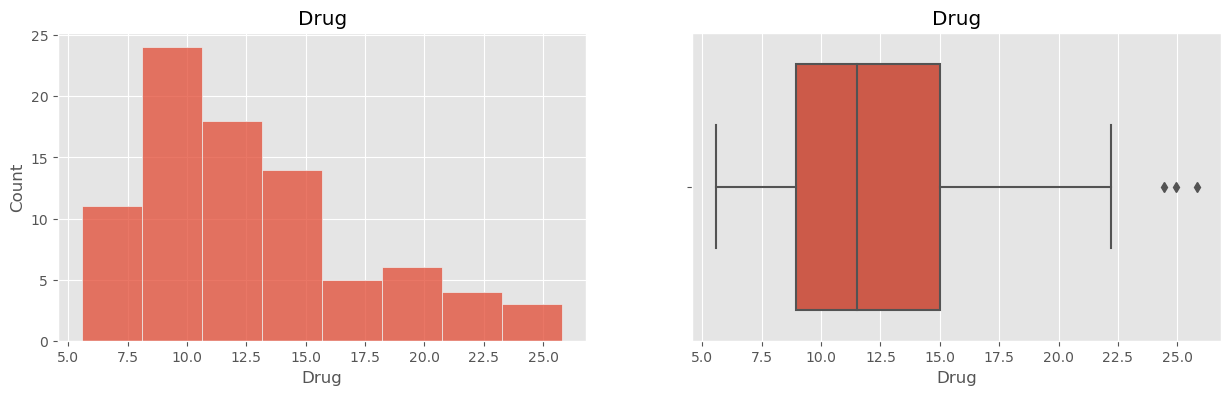

In [680]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Drug', ax=axes[0]);
histplot.set_title('Drug');
boxplot = sns.boxplot(data=df2, x='Drug', ax=axes[1]);
boxplot.set_title('Drug');

In [681]:
max = df2.loc[df2['Drug']<23, 'Drug'].max()
df2["Drug"] = df2["Drug"].mask(df2["Drug"] >23, max)

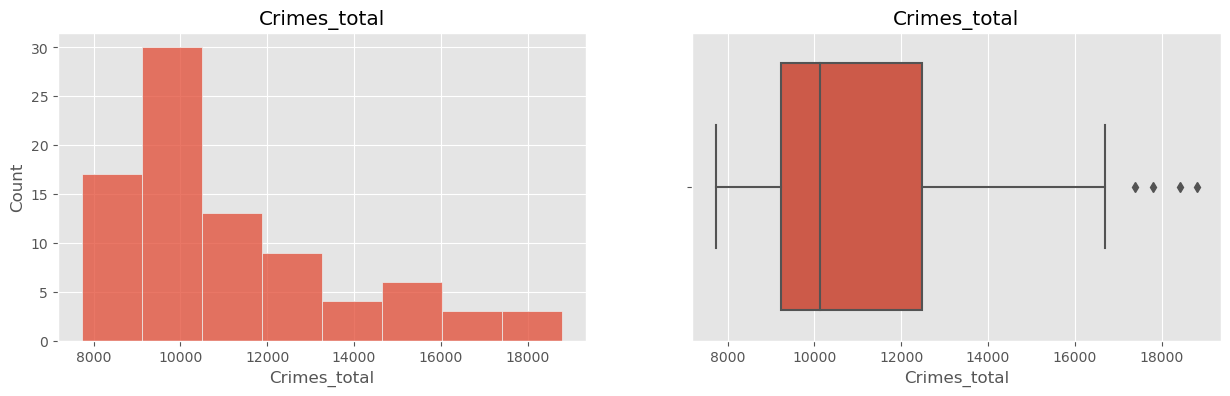

In [683]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df2, x='Сrimes_total', ax=axes[0]);
histplot.set_title('Сrimes_total');
boxplot = sns.boxplot(data=df2, x='Сrimes_total', ax=axes[1]);
boxplot.set_title('Сrimes_total');

In [684]:
max = df2.loc[df2['Сrimes_total']<17000, 'Сrimes_total'].max()
df2["Сrimes_total"] = df2["Сrimes_total"].mask(df2["Сrimes_total"] >17000, max)

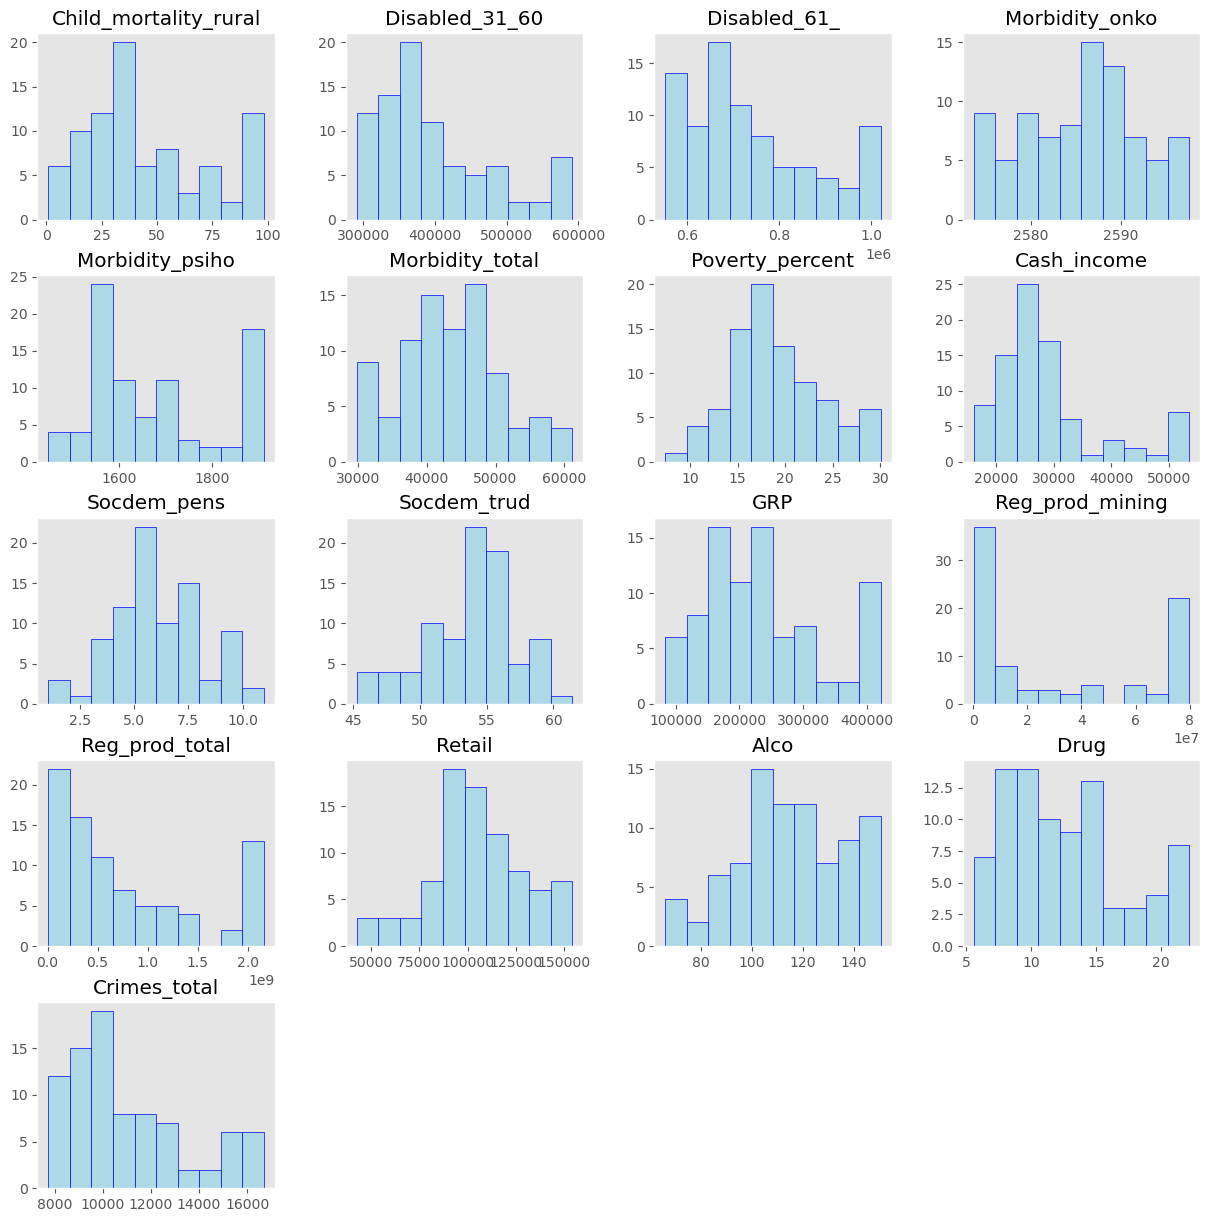

In [717]:
# Посмотрим теперь на распределение признаков:
df2.hist(figsize = (15,15), grid = False, color="lightblue" , ec="blue");
plt.show()

In [716]:
df_corr=df2.copy()

**НОРМАЛИЗАЦИЯ**

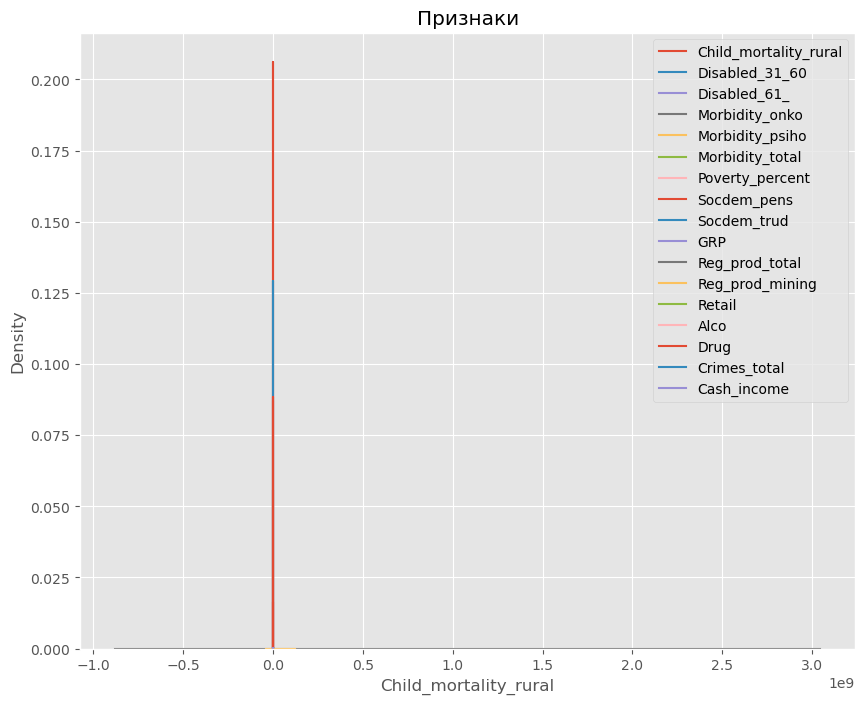

In [687]:
np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Признаки')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df_corr['Child_mortality_rural'], ax=ax1, label ='Child_mortality_rural')
sns.kdeplot(df_corr['Disabled_31_60'], ax=ax1, label ='Disabled_31_60')
sns.kdeplot(df_corr['Disabled_61_'], ax=ax1, label ='Disabled_61_')
sns.kdeplot(df_corr['Morbidity_onko'], ax=ax1, label ='Morbidity_onko')
sns.kdeplot(df_corr['Morbidity_psiho'], ax=ax1, label ='Morbidity_psiho')
sns.kdeplot(df_corr['Morbidity_total'], ax=ax1, label ='Morbidity_total')
sns.kdeplot(df_corr['Poverty_percent'], ax=ax1, label ='Poverty_percent')
sns.kdeplot(df_corr['Socdem_pens'], ax=ax1, label ='Socdem_pens')
sns.kdeplot(df_corr['Socdem_trud'], ax=ax1, label ='Socdem_trud')
sns.kdeplot(df_corr['GRP'], ax=ax1, label ='GRP')
sns.kdeplot(df_corr['Reg_prod_total'], ax=ax1, label ='Reg_prod_total')
sns.kdeplot(df_corr['Reg_prod_mining'], ax=ax1, label ='Reg_prod_mining')
sns.kdeplot(df_corr['Retail'], ax=ax1, label ='Retail')
sns.kdeplot(df_corr['Alco'], ax=ax1, label ='Alco')
sns.kdeplot(df_corr['Drug'], ax=ax1, label ='Drug')
sns.kdeplot(df_corr['Сrimes_total'], ax=ax1, label ='Сrimes_total')
sns.kdeplot(df_corr['Cash_income'], ax=ax1, label ='Cash_income')


plt.legend()

Признаки распределены по-разному: и на первый взгляд вообще ничего не понятно. Попробуем нормализовать их.

### нормализатор MinMaxScaler

<AxesSubplot: title={'center': 'После нормализации MinMaxScaler'}, xlabel='Child_mortality_rural', ylabel='Density'>

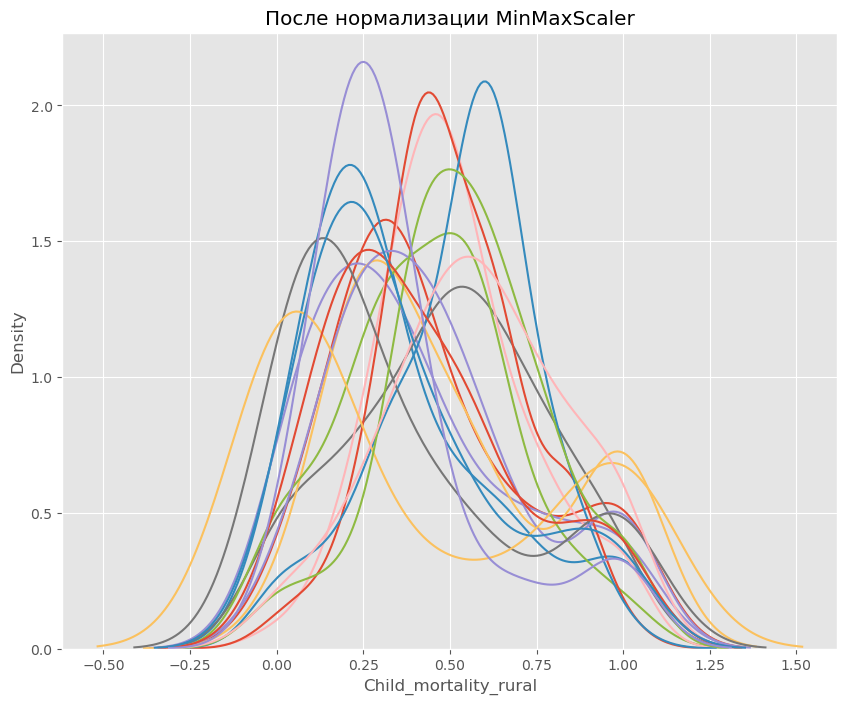

In [688]:
# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df_corr.columns)

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df_corr)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')



sns.kdeplot(df_mm['Child_mortality_rural'], ax=ax1, label ='Child_mortality_rural')
sns.kdeplot(df_mm['Disabled_31_60'], ax=ax1, label ='Disabled_31_60')
sns.kdeplot(df_mm['Disabled_61_'], ax=ax1, label ='Disabled_61_')
sns.kdeplot(df_mm['Morbidity_onko'], ax=ax1, label ='Morbidity_onko')
sns.kdeplot(df_mm['Morbidity_psiho'], ax=ax1, label ='Morbidity_psiho')
sns.kdeplot(df_mm['Morbidity_total'], ax=ax1, label ='Morbidity_total')
sns.kdeplot(df_mm['Poverty_percent'], ax=ax1, label ='Poverty_percent')
sns.kdeplot(df_mm['Socdem_pens'], ax=ax1, label ='Socdem_pens')
sns.kdeplot(df_mm['Socdem_trud'], ax=ax1, label ='Socdem_trud')
sns.kdeplot(df_mm['GRP'], ax=ax1, label ='GRP')
sns.kdeplot(df_mm['Reg_prod_total'], ax=ax1, label ='Reg_prod_total')
sns.kdeplot(df_mm['Reg_prod_mining'], ax=ax1, label ='Reg_prod_mining')
sns.kdeplot(df_mm['Retail'], ax=ax1, label ='Retail')
sns.kdeplot(df_mm['Alco'], ax=ax1, label ='Alco')
sns.kdeplot(df_mm['Drug'], ax=ax1, label ='Drug')
sns.kdeplot(df_mm['Сrimes_total'], ax=ax1, label ='Сrimes_total')
sns.kdeplot(df_mm['Cash_income'], ax=ax1, label ='Cash_income')

Теперь картина лучше. Многие признаки смещены вправо

### нормализатор RobustScaler

<AxesSubplot: title={'center': 'Распределения после RobustScaler'}, xlabel='Child_mortality_rural', ylabel='Density'>

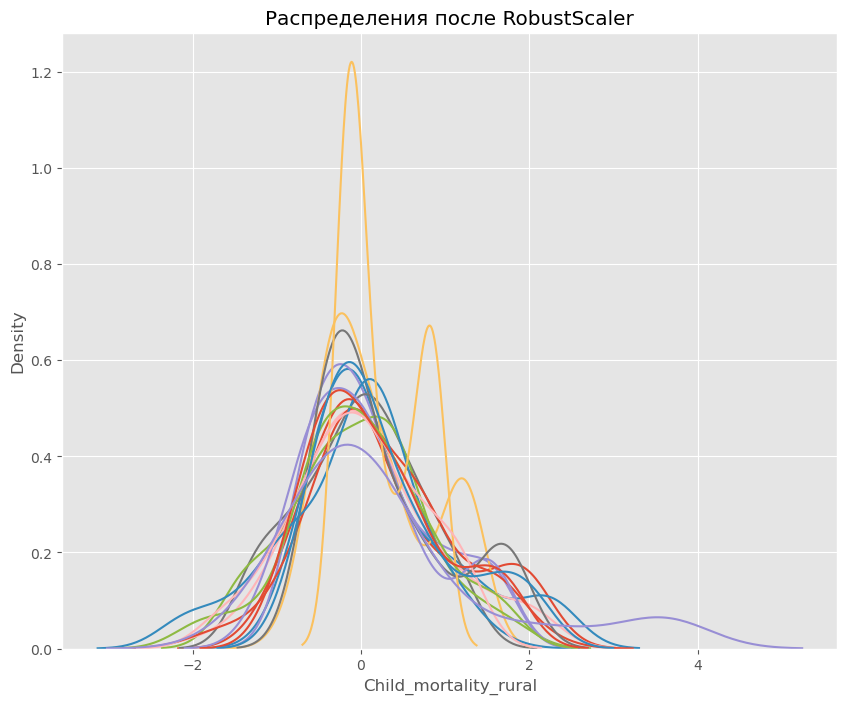

In [689]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df_corr)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')


sns.kdeplot(df_r['Child_mortality_rural'], ax=ax1, label ='Child_mortality_rural')
sns.kdeplot(df_r['Disabled_31_60'], ax=ax1, label ='Disabled_31_60')
sns.kdeplot(df_r['Disabled_61_'], ax=ax1, label ='Disabled_61_')
sns.kdeplot(df_r['Morbidity_onko'], ax=ax1, label ='Morbidity_onko')
sns.kdeplot(df_r['Morbidity_psiho'], ax=ax1, label ='Morbidity_psiho')
sns.kdeplot(df_r['Morbidity_total'], ax=ax1, label ='Morbidity_total')
sns.kdeplot(df_r['Poverty_percent'], ax=ax1, label ='Poverty_percent')
sns.kdeplot(df_r['Socdem_pens'], ax=ax1, label ='Socdem_pens')
sns.kdeplot(df_r['Socdem_trud'], ax=ax1, label ='Socdem_trud')
sns.kdeplot(df_r['GRP'], ax=ax1, label ='GRP')
sns.kdeplot(df_r['Reg_prod_total'], ax=ax1, label ='Reg_prod_total')
sns.kdeplot(df_r['Reg_prod_mining'], ax=ax1, label ='Reg_prod_mining')
sns.kdeplot(df_r['Retail'], ax=ax1, label ='Retail')
sns.kdeplot(df_r['Alco'], ax=ax1, label ='Alco')
sns.kdeplot(df_r['Drug'], ax=ax1, label ='Drug')
sns.kdeplot(df_r['Сrimes_total'], ax=ax1, label ='Сrimes_total')
sns.kdeplot(df_r['Cash_income'], ax=ax1, label ='Cash_income')


### стандартизатор StandardScaler

<AxesSubplot: title={'center': 'Распределения после StandardScaler'}, xlabel='Child_mortality_rural', ylabel='Density'>

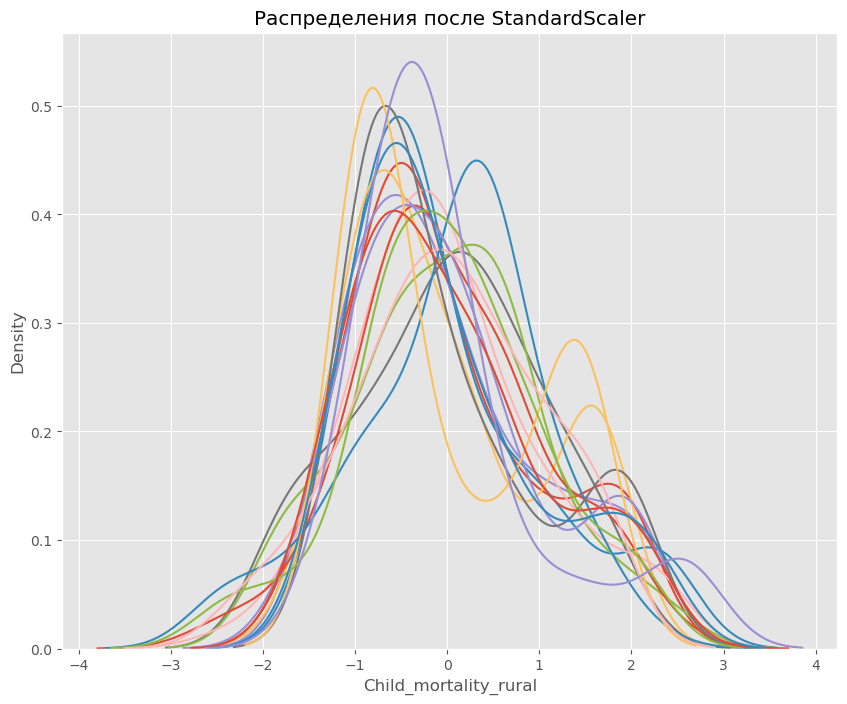

In [690]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df_corr)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')


sns.kdeplot(df_s['Child_mortality_rural'], ax=ax1, label ='Child_mortality_rural')
sns.kdeplot(df_s['Disabled_31_60'], ax=ax1, label ='Disabled_31_60')
sns.kdeplot(df_s['Disabled_61_'], ax=ax1, label ='Disabled_61_')
sns.kdeplot(df_s['Morbidity_onko'], ax=ax1, label ='Morbidity_onko')
sns.kdeplot(df_s['Morbidity_psiho'], ax=ax1, label ='Morbidity_psiho')
sns.kdeplot(df_s['Morbidity_total'], ax=ax1, label ='Morbidity_total')
sns.kdeplot(df_s['Poverty_percent'], ax=ax1, label ='Poverty_percent')
sns.kdeplot(df_s['Socdem_pens'], ax=ax1, label ='Socdem_pens')
sns.kdeplot(df_s['Socdem_trud'], ax=ax1, label ='Socdem_trud')
sns.kdeplot(df_s['GRP'], ax=ax1, label ='GRP')
sns.kdeplot(df_s['Reg_prod_total'], ax=ax1, label ='Reg_prod_total')
sns.kdeplot(df_s['Reg_prod_mining'], ax=ax1, label ='Reg_prod_mining')
sns.kdeplot(df_s['Retail'], ax=ax1, label ='Retail')
sns.kdeplot(df_s['Alco'], ax=ax1, label ='Alco')
sns.kdeplot(df_s['Drug'], ax=ax1, label ='Drug')
sns.kdeplot(df_s['Сrimes_total'], ax=ax1, label ='Сrimes_total')
sns.kdeplot(df_s['Cash_income'], ax=ax1, label ='Cash_income')

Наилучший вариант распределения после стандартизатор StandardScaler, его и будем использовать в дальнейшем,

Сохраним данную таблицу для дальнейшей работы:

In [692]:
df_corr.reset_index(inplace=True)
df_corr.to_csv('data/total/df_corr_2.csv', index=False)

### Проведем статистические тесты и посмотрим на распределение данных:

In [693]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

#Устновим уровень значимости
alpha = 0.05

**Тест Шапиро-Уилка**

In [694]:
from scipy.stats import shapiro
_, p = shapiro(df_s['Socdem_pens'])
print('p=%.3f' % p)

# Интерпретация 
if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.280
Данные распределены нормально


**Тест Д’Агостино**

In [695]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Socdem_pens'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.795
Данные распределены нормально


Проверим все остальные признаки по Тесту Д’Агостино:

In [696]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Child_mortality_rural'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.019
Данные не распределены нормально (мы отвергаем H0)


In [697]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Disabled_31_60'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.002
Данные не распределены нормально (мы отвергаем H0)


In [698]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Disabled_61_'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.015
Данные не распределены нормально (мы отвергаем H0)


In [699]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Morbidity_onko'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.119
Данные распределены нормально


In [700]:
from scipy.stats import normaltest
_, p = normaltest(df2['Morbidity_psiho'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


In [701]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Morbidity_total'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.806
Данные распределены нормально


In [702]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Poverty_percent'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.212
Данные распределены нормально


In [703]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Socdem_trud'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.091
Данные распределены нормально


In [704]:
from scipy.stats import normaltest
_, p = normaltest(df_s['GRP'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.038
Данные распределены нормально


In [705]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Reg_prod_total'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.003
Данные не распределены нормально (мы отвергаем H0)


In [706]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Reg_prod_mining'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


In [707]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Retail'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.849
Данные распределены нормально


In [708]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Alco'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.443
Данные распределены нормально


In [709]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Drug'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.033
Данные распределены нормально


In [710]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Сrimes_total'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.007
Данные не распределены нормально (мы отвергаем H0)


In [711]:
from scipy.stats import normaltest
_, p = normaltest(df_s['Cash_income'])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы
print('p=%.3f' % p)

# Интерпретация 
if p > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


Половина признаков по тестам у нас распределены нормально.